In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib

# Load the dataset
df = pd.read_csv('cleaned_merged_data_final.csv')

# Ensure 'Time' is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

In [2]:
df

,X,Y,Z,Time,Average_Heart_Rate,TEMP
0,-8.6499,-4.5781,0.187760,2016-04-12 00:00:00,61.48,31.17
1,-8.6275,-4.3198,0.023595,2016-04-12 00:01:00,64.02,31.17
2,-8.5055,-4.2772,0.275720,2016-04-12 00:02:00,64.16,31.17
3,-8.6279,-4.3163,0.367520,2016-04-12 00:03:00,64.08,31.17
4,-8.7008,-4.1459,0.407290,2016-04-12 00:04:00,63.89,31.17
...,...,...,...,...,...,...
44176,-2.4458,-10.0380,1.206400,2016-05-12 16:16:00,75.22,34.11
44177,-2.1038,-10.2980,1.224700,2016-05-12 16:17:00,74.25,34.11
44178,-2.5583,-9.7946,1.541500,2016-05-12 16:18:00,73.71,34.11
44179,-2.7153,-9.5697,2.031900,2016-05-12 16:19:00,75.50,34.11


In [3]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44181 entries, 0 to 44180
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   X                   44181 non-null  float64       
 1   Y                   44181 non-null  float64       
 2   Z                   44181 non-null  float64       
 3   Time                44181 non-null  datetime64[ns]
 4   Average_Heart_Rate  44181 non-null  float64       
 5   TEMP                44181 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.0 MB
None
                  X             Y             Z                 Time  \
count  44181.000000  44181.000000  44181.000000                44181   
mean      -4.570160     -5.086597      2.618400  2016-04-27 08:10:00   
min      -22.147000    -18.779000    -16.233000  2016-04-12 00:00:00   
25%       -6.789700     -9.103300      0.813240  2016-04-19 16:05:00   
50%       -3.977400 

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Charger et préparer les données
df = pd.read_csv('cleaned_merged_data_final.csv')
df['Time'] = pd.to_datetime(df['Time'])

In [26]:
df

,X,Y,Z,Time,Average_Heart_Rate,TEMP
0,-8.6499,-4.5781,0.187760,2016-04-12 00:00:00,61.48,31.17
1,-8.6275,-4.3198,0.023595,2016-04-12 00:01:00,64.02,31.17
2,-8.5055,-4.2772,0.275720,2016-04-12 00:02:00,64.16,31.17
3,-8.6279,-4.3163,0.367520,2016-04-12 00:03:00,64.08,31.17
4,-8.7008,-4.1459,0.407290,2016-04-12 00:04:00,63.89,31.17
...,...,...,...,...,...,...
44176,-2.4458,-10.0380,1.206400,2016-05-12 16:16:00,75.22,34.11
44177,-2.1038,-10.2980,1.224700,2016-05-12 16:17:00,74.25,34.11
44178,-2.5583,-9.7946,1.541500,2016-05-12 16:18:00,73.71,34.11
44179,-2.7153,-9.5697,2.031900,2016-05-12 16:19:00,75.50,34.11


In [27]:
# 2. Créer des caractéristiques supplémentaires
df['Movement_Magnitude'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)
df['HR_Rolling_Mean'] = df['Average_Heart_Rate'].rolling(window=10, min_periods=1).mean()
df['HR_Rolling_Std'] = df['Average_Heart_Rate'].rolling(window=10, min_periods=1).std()
df['Movement_Rolling_Mean'] = df['Movement_Magnitude'].rolling(window=10, min_periods=1).mean()
df['Movement_Rolling_Std'] = df['Movement_Magnitude'].rolling(window=10, min_periods=1).std()

In [28]:
# Sélectionner les caractéristiques pour le modèle
features = ['X', 'Y', 'Z', 'Average_Heart_Rate', 'TEMP', 
            'Movement_Magnitude', 'HR_Rolling_Mean', 'HR_Rolling_Std',
            'Movement_Rolling_Mean', 'Movement_Rolling_Std']
X = df[features].dropna()

In [29]:
# 3. Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# 4. Entraîner le modèle Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_scaled)


IsolationForest(contamination=0.01, random_state=42)

In [33]:
# Supprimer les lignes avec des valeurs manquantes et réinitialiser l'index
df = df.dropna().reset_index(drop=True)

In [34]:
# Préparer X pour le modèle
X = df[features]

In [35]:
# 3. Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:

# 4. Entraîner le modèle Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_scaled)


IsolationForest(contamination=0.01, random_state=42)

In [38]:
# 5. Prédire sur les données d'entraînement
predictions = model.predict(X_scaled)
df['Anomaly'] = predictions
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("\nStatistiques du modèle:")
print(f"Nombre total d'observations: {len(df)}")
print(f"Nombre d'anomalies détectées: {(df['Anomaly'] == 'Anomaly').sum()}")


Statistiques du modèle:
Nombre total d'observations: 44180
Nombre d'anomalies détectées: 442


In [39]:
# 6. Créer des cas de test
# Cas normal
normal_case = pd.DataFrame({
    'X': [2.0], 'Y': [3.0], 'Z': [1.0],
    'Average_Heart_Rate': [70], 'TEMP': [31.5],
    'Movement_Magnitude': [np.sqrt(2.0**2 + 3.0**2 + 1.0**2)],
    'HR_Rolling_Mean': [72], 'HR_Rolling_Std': [3],
    'Movement_Rolling_Mean': [3.5], 'Movement_Rolling_Std': [0.5]
})

In [40]:
# Cas de blessure simulée
injury_case = pd.DataFrame({
    'X': [0.1], 'Y': [0.1], 'Z': [0.1],
    'Average_Heart_Rate': [120], 'TEMP': [33.5],
    'Movement_Magnitude': [np.sqrt(0.1**2 + 0.1**2 + 0.1**2)],
    'HR_Rolling_Mean': [115], 'HR_Rolling_Std': [10],
    'Movement_Rolling_Mean': [0.2], 'Movement_Rolling_Std': [0.05]
})

In [41]:
# Fonction de test
def test_case(case, case_name):
    case_scaled = scaler.transform(case[features])
    prediction = model.predict(case_scaled)
    result = 'Anomaly (Possible Injury)' if prediction[0] == -1 else 'Normal'
    print(f"\nRésultat pour {case_name}:")
    print(f"Prédiction: {result}")
    print("Valeurs:")
    for col in features:
        print(f"{col}: {case[col].values[0]:.2f}")
    return prediction[0]


Résultat pour Cas Normal:
Prédiction: Normal
Valeurs:
X: 2.00
Y: 3.00
Z: 1.00
Average_Heart_Rate: 70.00
TEMP: 31.50
Movement_Magnitude: 3.74
HR_Rolling_Mean: 72.00
HR_Rolling_Std: 3.00
Movement_Rolling_Mean: 3.50
Movement_Rolling_Std: 0.50

Résultat pour Cas de Blessure:
Prédiction: Anomaly (Possible Injury)
Valeurs:
X: 0.10
Y: 0.10
Z: 0.10
Average_Heart_Rate: 120.00
TEMP: 33.50
Movement_Magnitude: 0.17
HR_Rolling_Mean: 115.00
HR_Rolling_Std: 10.00
Movement_Rolling_Mean: 0.20
Movement_Rolling_Std: 0.05


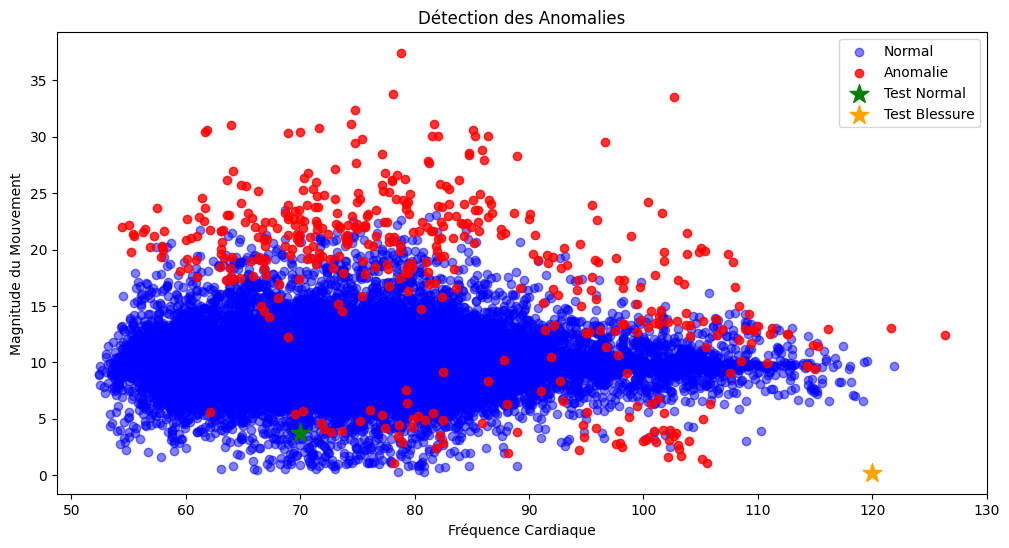

In [42]:
# Tester les deux cas
test_case(normal_case, "Cas Normal")
test_case(injury_case, "Cas de Blessure")

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Anomaly']=='Normal']['Average_Heart_Rate'], 
           df[df['Anomaly']=='Normal']['Movement_Magnitude'], 
           c='blue', label='Normal', alpha=0.5)
plt.scatter(df[df['Anomaly']=='Anomaly']['Average_Heart_Rate'], 
           df[df['Anomaly']=='Anomaly']['Movement_Magnitude'], 
           c='red', label='Anomalie', alpha=0.8)
plt.scatter(normal_case['Average_Heart_Rate'], normal_case['Movement_Magnitude'], 
           c='green', marker='*', s=200, label='Test Normal')
plt.scatter(injury_case['Average_Heart_Rate'], injury_case['Movement_Magnitude'], 
           c='orange', marker='*', s=200, label='Test Blessure')
plt.xlabel('Fréquence Cardiaque')
plt.ylabel('Magnitude du Mouvement')
plt.title('Détection des Anomalies')
plt.legend()
plt.show()

In [43]:
# Afficher les statistiques des données normales
print("\nStatistiques des données normales:")
print(df[df['Anomaly']=='Normal'][['Average_Heart_Rate', 'Movement_Magnitude']].describe())


Statistiques des données normales:
       Average_Heart_Rate  Movement_Magnitude
count        43738.000000        43738.000000
mean            74.259635            9.854106
std             10.390219            1.853153
min             52.420000            0.305982
25%             66.120000            9.498589
50%             74.515000            9.749052
75%             80.610000           10.079835
max            121.870000           23.491796
